# 1. Importing Libraries

In [4]:
# !pip install seaborn

In [5]:
# !pip uninstall -y tensorflow
# !pip install tensorflow==2.12.0
# !pip install tensorflow-gpu==2.12.0
# import tensorflow as tf
# print(tf.__version__)

In [6]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
print(tf. __version__)

2.12.0


In [8]:
## initializing basic needed params

## Image size
IMAGE_SIZE = 150 

## batch size 
BATCH_SIZE = 32

## Channel size
CHANELS = 3

## Epochs
EPOCHS = 100

# 2. Loading Dataset

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Intel Image Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3000 files belonging to 6 classes.


In [11]:
labels = dataset.class_names
print(f"label names :- {labels}\ntotal labels {len(labels)}\nlength of dataset:- {len(dataset)}")

label names :- ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
total labels 6
length of dataset:- 94


In [12]:
# 94*32 = 3008 ~ 3000

### Visualizing Data

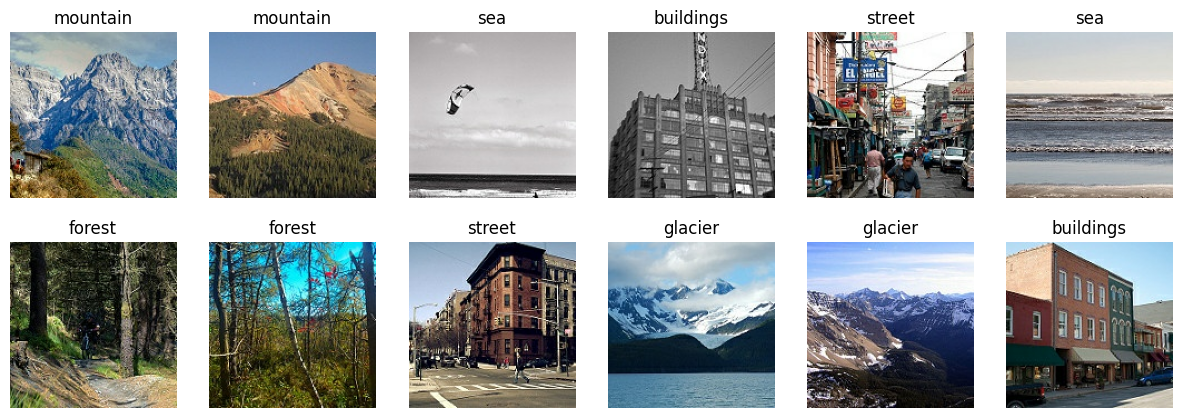

In [13]:
plt.figure(figsize=(15,5))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(2,6,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(labels[label_batch[i].numpy()])
        plt.axis("off")

# 3. Spliting dataset

In [14]:
len(dataset)

94

In [15]:
## training = 80%
# 10% validation, 10% testing

In [16]:
# training data
train_size = 0.8
train_size = len(dataset)* train_size
print(f"Training size :- {train_size}")


# validation data
val_size = 0.1
val_size = len(dataset) * val_size
print(f"validation size :- {val_size}")


# Testing data
test_ds = 0.1
test_ds = len(dataset) * test_ds
print(f"Testing size :- {test_ds}")


Training size :- 75.2
validation size :- 9.4
Testing size :- 9.4


In [17]:
train_split = 0.8
test_split = 0.1
val_split  = 0.1


ds_len = len(dataset)

train_size = int(ds_len * train_split)
val_size = int(ds_len * val_split)

train_ds = dataset.take(train_size)


val_ds = dataset.skip(train_size).take(val_size) # validation data should not include trainig data
test_ds = dataset.skip(train_size).skip(val_size)  # test data should not include testing as well as validation data

print(f"Training data size:- {train_size}\nlenght {len(train_ds)}\n")
print(f"Validation data size:- {val_size}\nlenght {len(val_ds)}\n")
print(f"Testing data\nlenght {len(test_ds)}")

Training data size:- 75
lenght 75

Validation data size:- 9
lenght 9

Testing data
lenght 10


In [18]:
def train_test_split_tf(ds, train_split = 0.8, val_split = 0.1, test_split=0.1, shuffle=True, shuffle_size = 10000):
    
    ds_len = len(dataset)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)


    train_size = int(ds_len * train_split)
    val_size = int(ds_len * val_split)

    train_ds = ds.take(train_size) # it includs 80 % data 


    val_ds = ds.skip(train_size).take(val_size) # validation data should not include trainig data
    test_ds = ds.skip(train_size).skip(val_size)  # test data should not include testing as well as validation data
    
    return train_ds, val_ds, test_ds

In [20]:
train_ds, val_ds, test_ds = train_test_split_tf(dataset)

In [21]:
print(f"training_data_size : {len(train_ds)}\nvalidation_data_size : {len(val_ds)}\ntesting_data_size : {len(test_ds)}")

training_data_size : 75
validation_data_size : 9
testing_data_size : 10


In [22]:
# This way we are optimizing our model

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# 4. Preprocessing

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

# 5. Data Agumentation
###### This is a tuning technique which is use to create more similar pics in order to avoid overfitting in the model

In [25]:
data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.3)
])

# 5. Model Building

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANELS)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(filters=32,kernel_size=(3,3), padding="same", activation="relu",input_shape=input_shape),  
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), padding="same",  activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), padding="same",  activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=n_classes, activation='softmax')
])

model.build(input_shape=input_shape )

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 150, 150, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 150, 150, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 150, 150, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 75, 75, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 75, 75, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 37, 37, 64)         0         
 2D)                                                  

In [28]:
model.compile(
    optimizer="adam",
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds, 
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/100
75/75 [==============================] - 53s 712ms/step - loss: 1.6437 - accuracy: 0.2989 - val_loss: 1.5157 - val_accuracy: 0.3542
Epoch 2/100
75/75 [==============================] - 58s 770ms/step - loss: 1.4333 - accuracy: 0.4147 - val_loss: 1.4309 - val_accuracy: 0.4306
Epoch 3/100
75/75 [==============================] - 64s 857ms/step - loss: 1.3095 - accuracy: 0.4829 - val_loss: 1.5184 - val_accuracy: 0.4236
Epoch 4/100
75/75 [==============================] - 61s 807ms/step - loss: 1.2757 - accuracy: 0.4987 - val_loss: 1.3657 - val_accuracy: 0.4722
Epoch 5/100
75/75 [==============================] - 64s 854ms/step - loss: 1.1968 - accuracy: 0.5293 - val_loss: 1.5397 - val_accuracy: 0.4340
Epoch 6/100
75/75 [==============================] - 72s 958ms/step - loss: 1.2012 - accuracy: 0.5368 - val_loss: 1.3217 - val_accuracy: 0.4722
Epoch 7/100
75/75 [==============================] - 81s 1s/step - loss: 1.1405 - accuracy: 0.5732 - val_loss: 1.2667 - val_accuracy: 0.